## **City of Pittsburgh - Crime**

**Link to datasets:**  
https://data.wprdc.org/dataset/uniform-crime-reporting-data <br>
https://data.wprdc.org/dataset/pittsburgh-american-community-survey-2015-miscellaneous-data/resource/82f29015-6905-4b1c-8300-afe9bb2231b3  

**Metric: Crime**  
To see which neighborhood has the best community, I decided to look at how lively a specific neighborhood is using the Police Blotter Archive. The amount of offenses in a given place typically correlates to how much is happening in the community. If someone living there feels on edge everytime they go out onto the street in their neighborhood, then they will be more alert and spirited.

### **Crime Frequency**

---

First, I import pandas and load in the crime data.

---

In [175]:
import pandas as pd

#Load crime data
crimeData = pd.read_csv("crime.tsv", index_col="_id", sep='\t')

#Display crime data
crimeData.head()

,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
_id,,,,,,,,,,,,,,,
1,2802309,16000001.0,10,2016-01-01T00:00:00,"400 Block North Shore DR Pittsburgh, PA 15212",Y,North Shore,1,HARRASSMENT/THREAT/ATTEMPT/PHY,2702 Aggravated Assault. / 2709(a) Harassment....,2205.0,1.0,6.0,-80.012337,40.446263
2,2803174,16004547.0,11,2016-01-01T00:01:00,"5400 Block Carnegie ST Pittsburgh, PA 15201",N,Upper Lawrenceville,2,THEFT BY DECEPTION,3922 Theft by Deception.,1011.0,7.0,2.0,-79.950295,40.482290
3,2801809,16000367.0,4,2016-01-01T00:10:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,DISCHARGE OF FIREARM INTO OCC.STRUCTURE,2707.1 Discharge of a Firearm into Occupied St...,2609.0,1.0,1.0,-80.000966,40.478651
4,2802315,16000035.0,10,2016-01-01T00:15:00,"300 Block Wood ST Pittsburgh, PA 15222",Y,Golden Triangle/Civic Arena,2,HARRASSMENT/THREAT/ATTEMPT/PHY,2709(a)(3) Harassment No Legitimate Purpose,201.0,6.0,6.0,-80.001251,40.438918
5,2802312,16000024.0,4,2016-01-01T00:16:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,PROP MISSILE INTO OCC VEHICLE/OR ROADWAY,2705 Recklessy Endangering Another Person. / 3...,2609.0,1.0,1.0,-80.000966,40.478651


---
This dataset has far too many columns, I only need the offense and the neighborhood where the crime took place. Also, I removed any rows with a null value for accuracy.

---

In [176]:
#Drop the irrelevant columns and rows with a null value
filtCrime = crimeData[['INCIDENTNEIGHBORHOOD', 'OFFENSES']]
filtCrime = filtCrime.dropna()

filtCrime.head()

,INCIDENTNEIGHBORHOOD,OFFENSES
_id,,
1,North Shore,2702 Aggravated Assault. / 2709(a) Harassment....
2,Upper Lawrenceville,3922 Theft by Deception.
3,Northview Heights,2707.1 Discharge of a Firearm into Occupied St...
4,Golden Triangle/Civic Arena,2709(a)(3) Harassment No Legitimate Purpose
5,Northview Heights,2705 Recklessy Endangering Another Person. / 3...


---
This is great, but I now I need to know exactly how many offenses occurred in each neighborhood

---

In [177]:
#Count each offense by neighborhood
crimeFreq = filtCrime.groupby("INCIDENTNEIGHBORHOOD").count()

#Display the offenses in each neighbood
crimeFreq

,OFFENSES
INCIDENTNEIGHBORHOOD,
Allegheny Center,3532
Allegheny West,1077
Allentown,5164
Arlington,2109
Arlington Heights,561
...,...
Upper Lawrenceville,1635
West End,1247
West Oakland,1920


### **Population**
---
Now that we have the amount of crimes in each neighborhood, we need to make sure that neighborhoods with very little population aren't unfairly seen as calmer while neighborhoods with a large population are seen as hotspots. In order to do this, I loaded in a new dataset with the population of every neighborhood. With this data, I can compare the crime incidences to the population in order to get ratios that we can then compare to each other.

---

In [172]:
#Load population data
popData = pd.read_csv("population.tsv", index_col="_id", sep='\t')
popData = popData[['Neighborhood', 'Estimate; Total']]

#Display the dataset
popData

,Neighborhood,Estimate; Total
_id,,
1,Allegheny Center,1411.0
2,Allegheny West,343.0
3,Allentown,2558.0
4,Arlington,1852.0
5,Arlington Heights,272.0
...,...,...
87,Upper Lawrenceville,2754.0
88,West End,235.0
89,West Oakland,1717.0


---
Now we can merge the two dataframes into one, removing any neighborhoods that aren't in either table. The population dataset's neighborhoods will be used as the crime dataset has duplicates.

---

In [181]:
#Merge the two dataframes, use 
popCrime = pd.merge(popData, crimeFreq, left_on='Neighborhood', right_index=True)

#Display merged dataset
popCrime

,Neighborhood,Estimate; Total,OFFENSES
_id,,,
1,Allegheny Center,1411.0,3532
2,Allegheny West,343.0,1077
3,Allentown,2558.0,5164
4,Arlington,1852.0,2109
5,Arlington Heights,272.0,561
...,...,...,...
87,Upper Lawrenceville,2754.0,1635
88,West End,235.0,1247
89,West Oakland,1717.0,1920


---
Even with the ratio, we should still make sure that neighborhoods with very little people aren't counted. Let's remove any neighborhood with less than 500 people.

---

In [264]:
popCrime = popCrime[popCrime['Estimate; Total'] > 500]
popCrime

,Neighborhood,Estimate; Total,OFFENSES
_id,,,
1,Allegheny Center,1411.0,3532
3,Allentown,2558.0,5164
4,Arlington,1852.0,2109
6,Banksville,3858.0,1749
7,Bedford Dwellings,1349.0,2600
...,...,...,...
86,Upper Hill,1884.0,1908
87,Upper Lawrenceville,2754.0,1635
89,West Oakland,1717.0,1920


---
Now we can find the ratio by iterating through the dataframe, finding the ratio, and creating a new dictionary to store the values.

---

In [265]:
#Create an empty dictionary
crimeRatio = dict()

#Iterate through the dataframe
for index, row in popCrime.iterrows():
    #Assign a new entry named the current neighborhood, set it equal to population/offenses
    crimeRatio[row['Neighborhood']] = row['Estimate; Total'] / row['OFFENSES']
    
#Convert dictionary to dataframe
graphingRatio = pd.DataFrame([crimeRatio], index = ['Ratio']).T
graphingRatio

,Ratio
Allegheny Center,0.399490
Allentown,0.495352
Arlington,0.878141
Banksville,2.205832
Bedford Dwellings,0.518846
...,...
Upper Hill,0.987421
Upper Lawrenceville,1.684404
West Oakland,0.894271
Westwood,2.202366


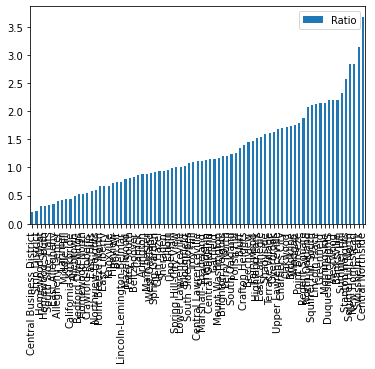

In [266]:
#Sort the values in ascending order and plot a bar graph
graphingRatio = graphingRatio.sort_values('Ratio', ascending=True)
graphingRatio.plot(kind='bar')

---
As you can see, this is very hard to read. Let's just take the top 10 neighborhoods with the most ideal crime ratio to person.

---

Text(0, 0.5, 'Ratio')

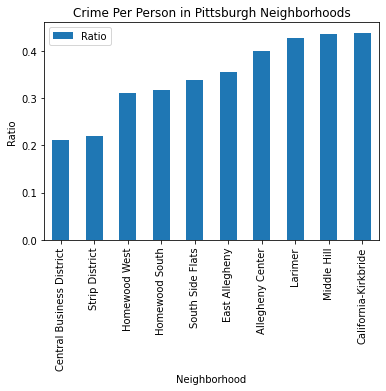

In [278]:
import matplotlib.pyplot as plt

#Crop to the best 10
bestCrime = graphingRatio.head(10)

#Plot the bar graph with labels
bestCrime.plot(kind='bar', title="Crime Per Person in Pittsburgh Neighborhoods")
plt.xlabel("Neighborhood")
plt.ylabel("Ratio")

---
So, according to this, the top three neighborhoods in Pittsburgh to live in terms of the crime per person are the Central Business District, Strip District, and Homewood West. If one chooses to live here, the town will feel more like a living, breathing organism than a sterile community.

---